This project involved exploratory data analysis, data visulaization and building naive Bayes classifier model to predict the variable CHD(coronary artery disease).The dataset was obtained from the US Department of Health & Human Services.

Following is the description of the important variables in the dataset that were used in the analysis-

CHD — Death rate per 100,000 populations in each county.
Stroke — Death rate due to stroke per 100,000 populations in each county.
Smoker — The percentage of adults who responded “yes” to the question “Do you smoke
cigarettes now?”
Diabetes — The percentage of adults who responded “yes” to the question “Have you ever been
told by a doctor that you have diabetes?”
Few fruits/vegetables — The percentage of adults reporting an average fruit and vegetable
consumption of less than 5 times per day
Obesity —This is based on body mass index (BMI). A BMI of 27.8, for men, and 27.3, for
women, or more is considered obese.
High Blood Pressure — The percentage of adults who responded yes to the question, “Have you
ever been told by a doctor, nurse, or other health professionals that you have high blood pressure?”
No Exercise — The percentage of adults that are sedentary without lack of exercise.

In [88]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [1]:
data=read.csv(file="dataset.csv")

In [2]:
head(data)

State_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Stroke,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,CHD
<int>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Baldwin,Alabama,AL,162586,48.7,27.2,76.2,23.6,30.5,24.6,7.2,156.5
1,Calhoun,Alabama,AL,112141,79.2,29.2,81.9,27.0,33.2,25.5,11.2,189.3
1,Chilton,Alabama,AL,41744,70.3,30.3,82.8,31.2,26.5,30.0,6.0,188.1
1,Cullman,Alabama,AL,79886,71.1,29.4,76.2,22.2,35.0,27.6,10.0,203.6
1,DeKalb,Alabama,AL,67271,58.6,37.0,80.7,24.3,35.3,19.1,7.8,171.9
1,Elmore,Alabama,AL,73937,60.4,27.7,85.0,24.8,23.0,22.6,5.5,138.8


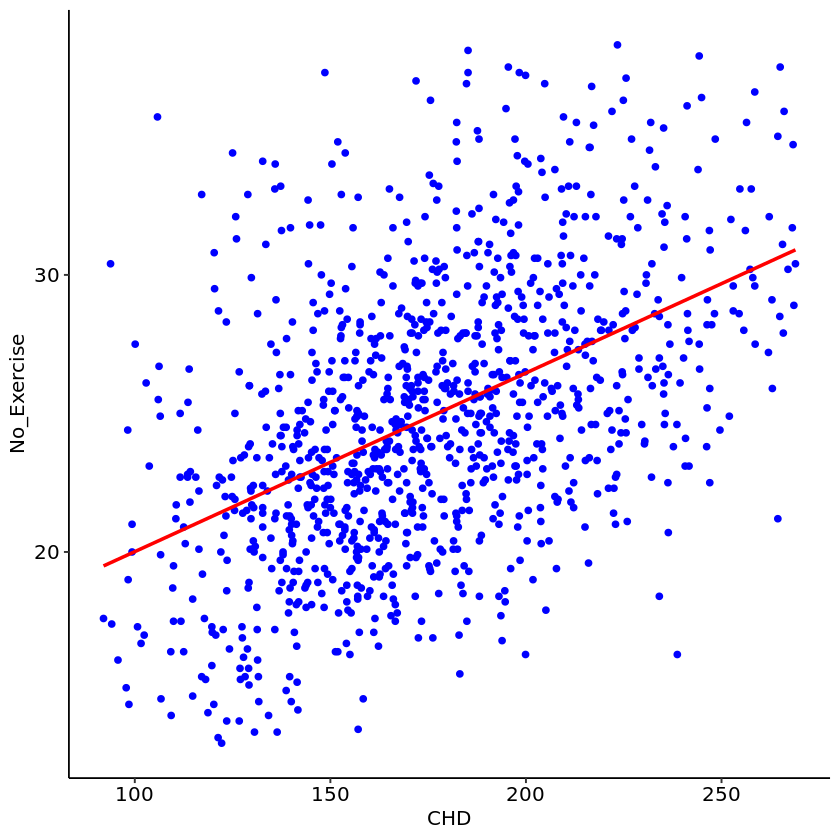

In [12]:
ggplot(data = data, aes(x = CHD, y = No_Exercise)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", color='red', se = FALSE)
  

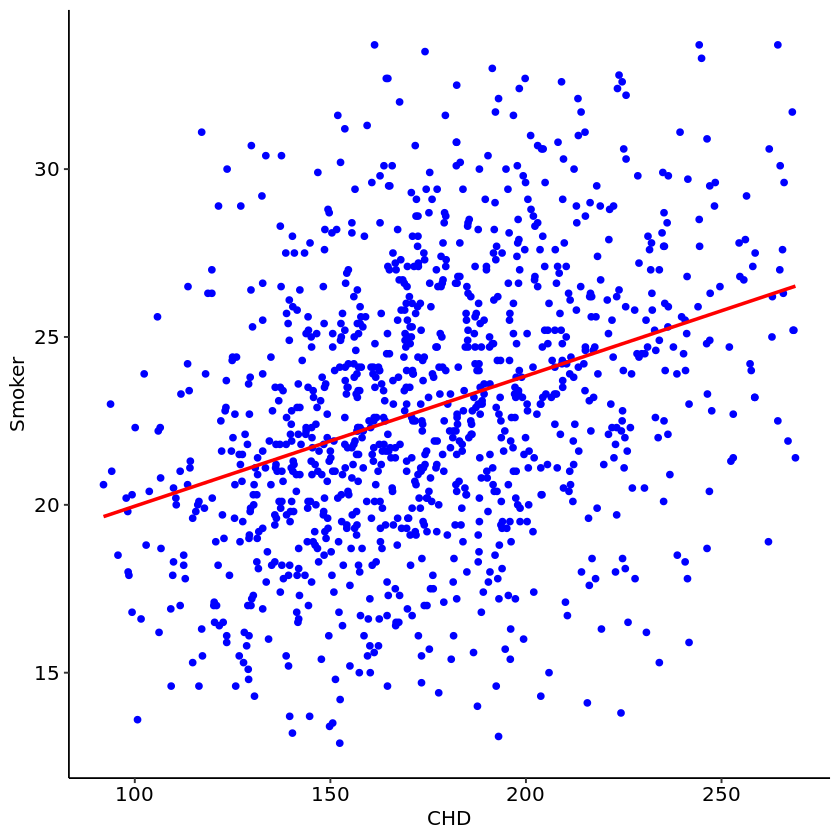

In [14]:
ggplot(data = data, aes(x = CHD, y = Smoker)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", color='red', se = FALSE)

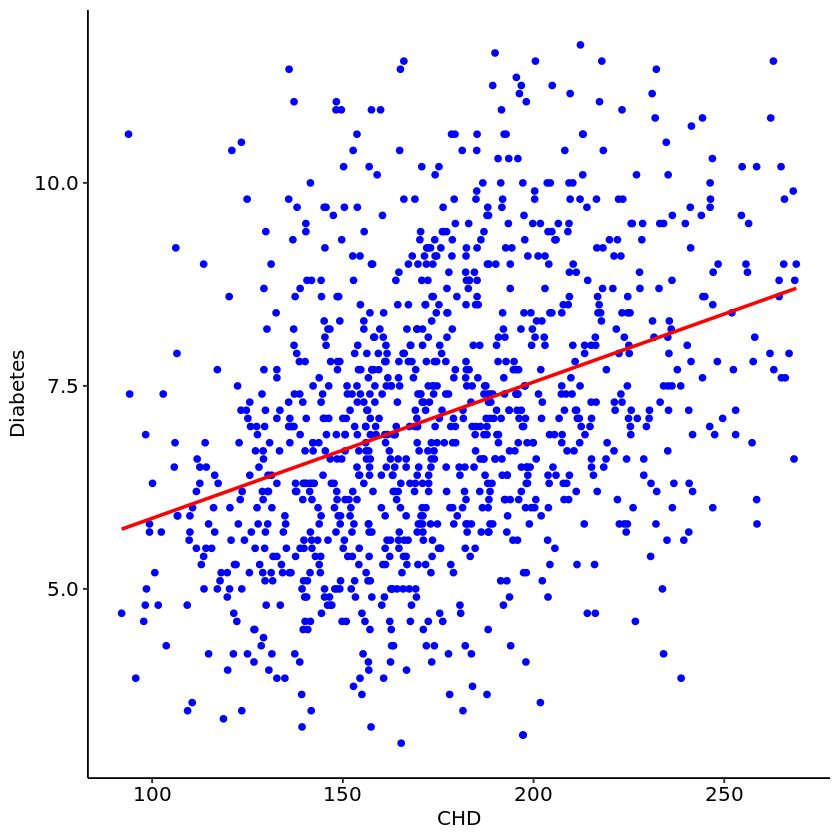

In [15]:

ggplot(data = data, aes(x = CHD, y = Diabetes)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", color='red', se = FALSE)

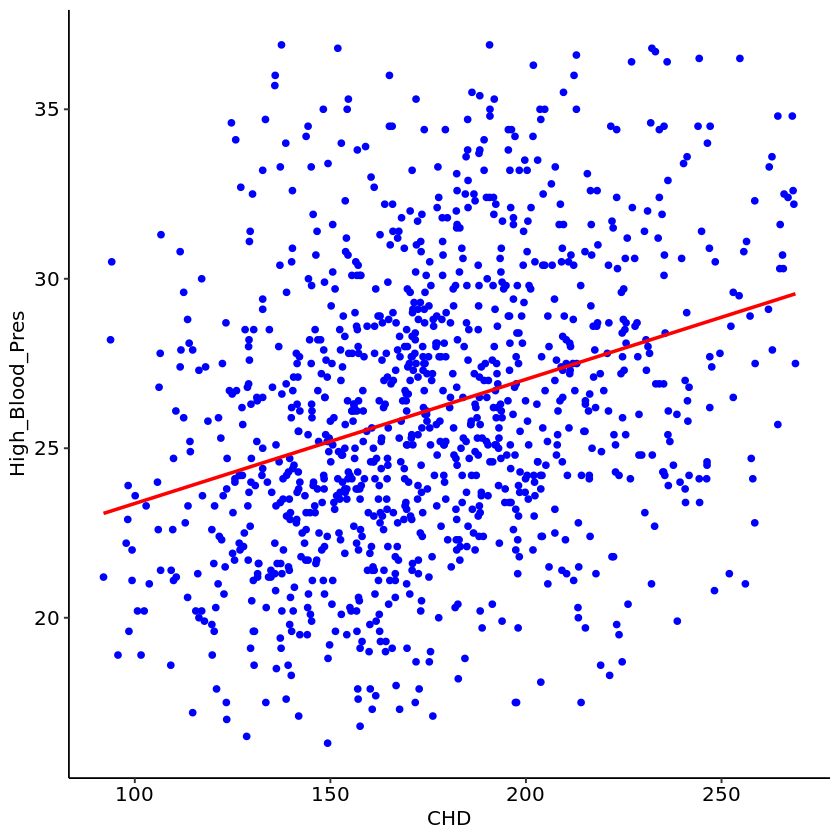

In [16]:
ggplot(data = data, aes(x = CHD, y = High_Blood_Pres)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", color='red', se = FALSE)

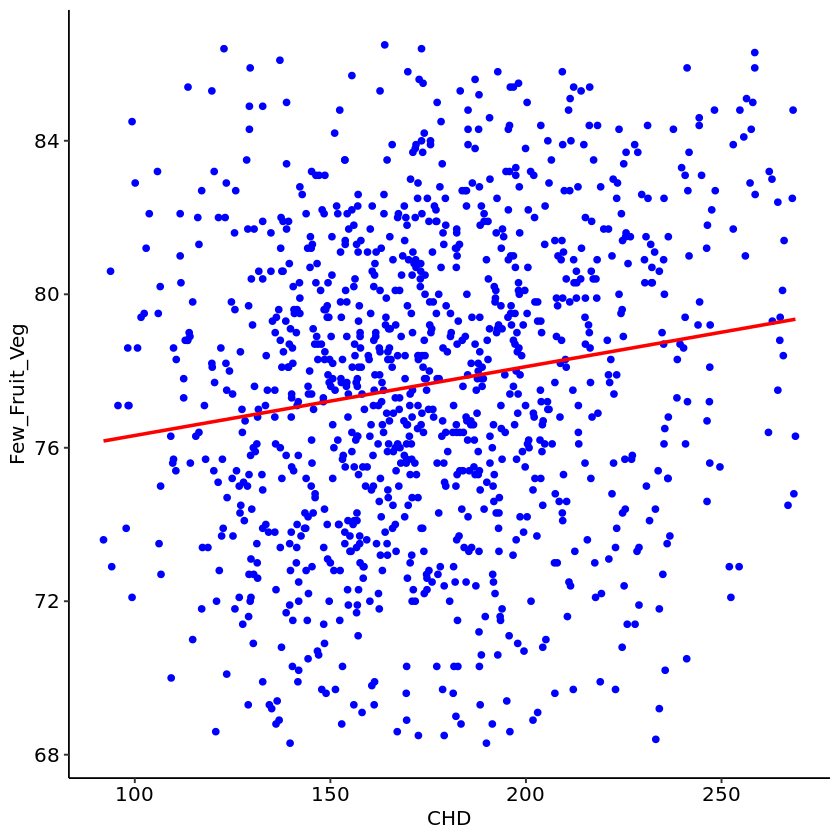

In [17]:
ggplot(data = data, aes(x = CHD, y = Few_Fruit_Veg)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", color='red', se = FALSE)

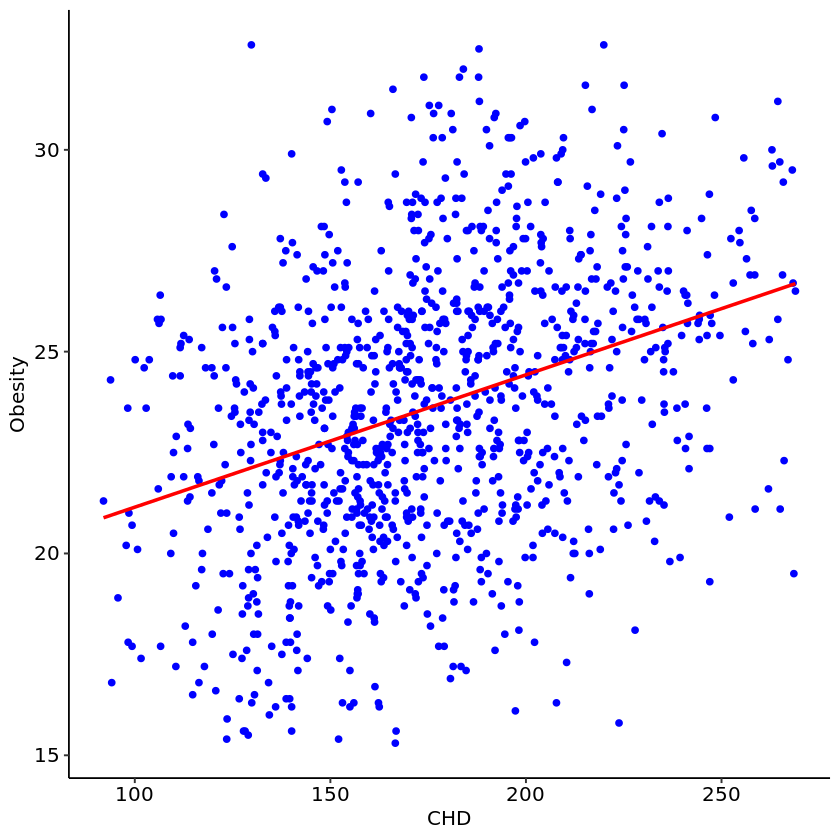

In [18]:
ggplot(data = data, aes(x = CHD, y = Obesity)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", color='red', se = FALSE)

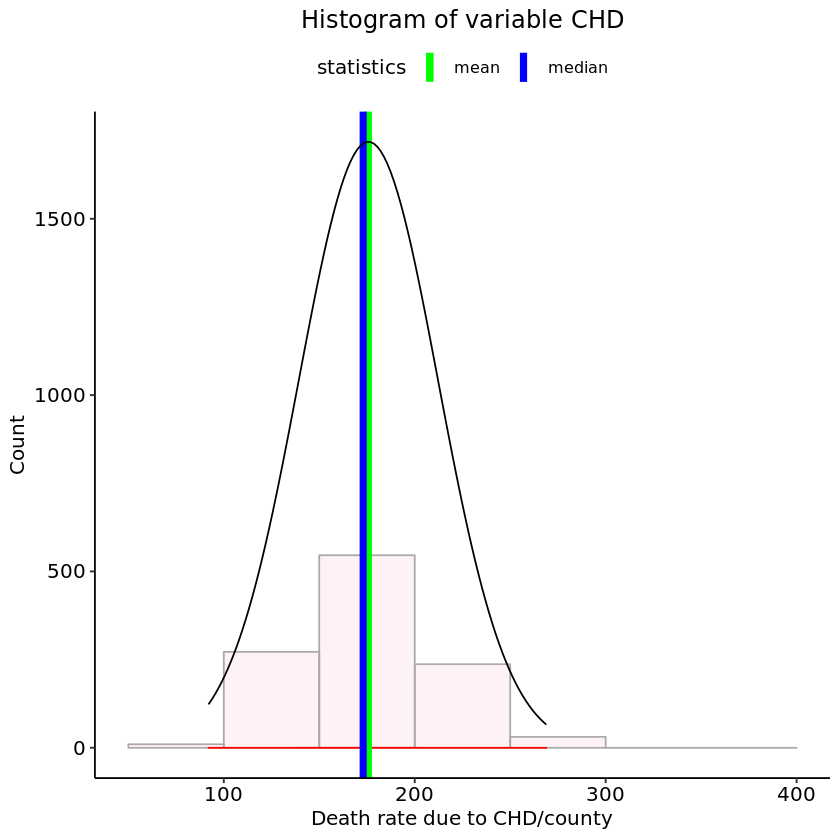

In [19]:
#histogram of CHD with mean,median and normal curve
n<-3141
mean<- mean(data$CHD)
sd<- sqrt(var(data$CHD))
bindwidth<-50
height<- rnorm(n,mean,sd)
ggplot(data=data, aes(data$CHD)) + geom_histogram(breaks=seq(50, 400, by = 50),col="darkgray", fill="pink", alpha=.2)+ 
  geom_density(col=2) + labs(title="Histogram of variable CHD",x="Death rate due to CHD/county", y="Count")+
  geom_vline(aes(xintercept=mean(data$CHD),color='mean'),show.legend = TRUE,size=2)+
  geom_vline(aes(xintercept=median(data$CHD),color='median'),show.legend = TRUE,size=2)+
  scale_color_manual(name='statistics',values=c(mean='green',median='blue'))+
  stat_function(fun=function(x,mean,sd,n,bw){dnorm(x=x,mean=mean,sd=sd)*n*bw}, args=c(mean=mean,sd=sd,n=n,bw=bindwidth))

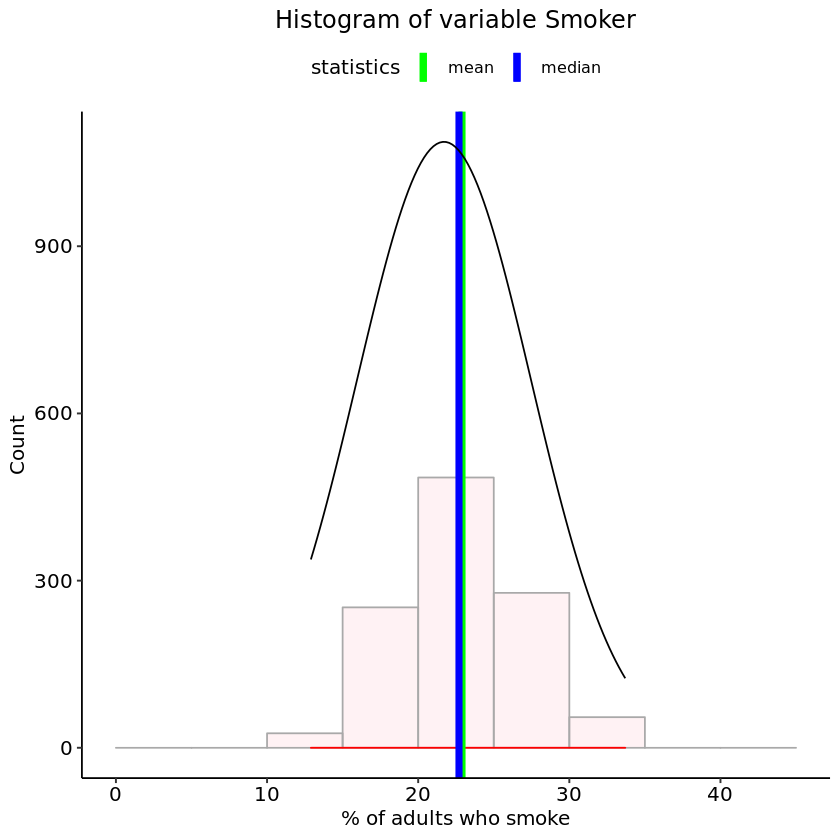

In [25]:
#risk factors- independent variable
#histogram of smoker with mean,median and normal curve
  n<-3141
  mean<- 21.70901
  sd= 5.761835
  bindwidth<-5
  height<- rnorm(n,mean,sd)
  ggplot(data=data, aes(data$Smoker)) + geom_histogram(breaks=seq(0, 45, by = 5),col="darkgray", fill="pink", alpha=.2)+ 
     geom_density(col=2) + labs(title="Histogram of variable Smoker",x="% of adults who smoke", y="Count")+
     geom_vline(aes(xintercept=mean(data$Smoker),color='mean'),show.legend = TRUE,size=2)+
       geom_vline(aes(xintercept=median(data$Smoker),color='median'),show.legend = TRUE,size=2)+
       scale_color_manual(name='statistics',values=c(mean='green',median='blue'))+
       stat_function(fun=function(x,mean,sd,n,bw){dnorm(x=x,mean=mean,sd=sd)*n*bw}, args=c(mean=mean,sd=sd,n=n,bw=bindwidth))

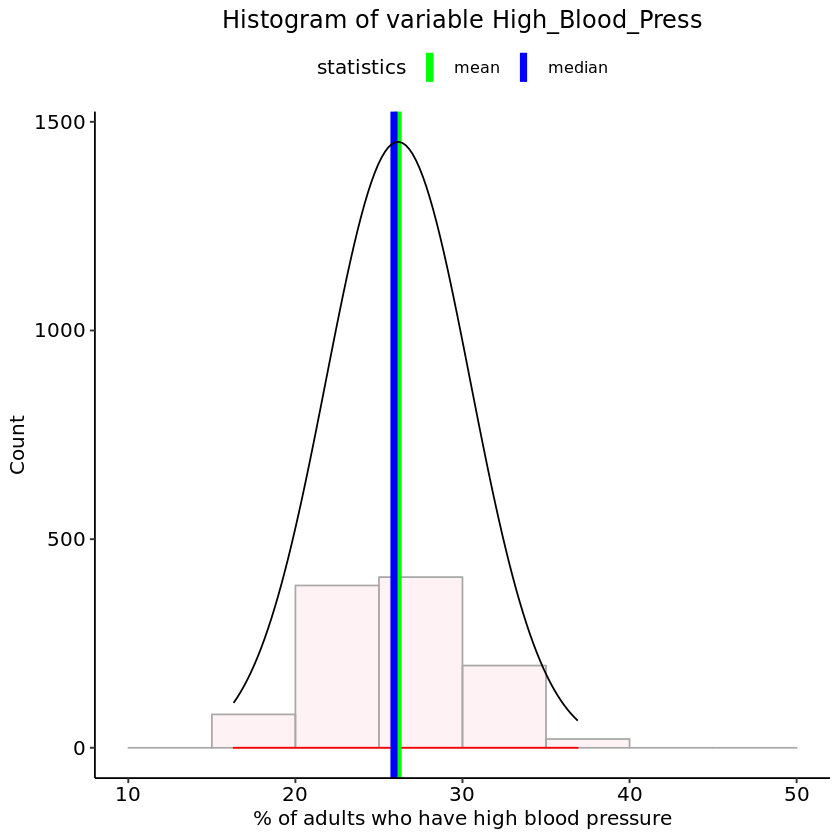

In [24]:
 
  #histogram of HIGH BP with mean,median and normal curve
  n<-3141
  mean<- mean(data$High_Blood_Pres)
  sd<- sqrt(var(data$High_Blood_Pres))
  bindwidth<-5
  height<- rnorm(n,mean,sd)
  ggplot(data=data, aes(data$High_Blood_Pres)) + geom_histogram(breaks=seq(10, 50, by = 5),col="darkgray", fill="pink", alpha=.2)+ 
    geom_density(col=2) + labs(title="Histogram of variable High_Blood_Press",x="% of adults who have high blood pressure", y="Count")+
    geom_vline(aes(xintercept=mean(data$High_Blood_Pres),color='mean'),show.legend = TRUE,size=2)+
    geom_vline(aes(xintercept=median(data$High_Blood_Pres),color='median'),show.legend = TRUE,size=2)+
    scale_color_manual(name='statistics',values=c(mean='green',median='blue'))+
    stat_function(fun=function(x,mean,sd,n,bw){dnorm(x=x,mean=mean,sd=sd)*n*bw}, args=c(mean=mean,sd=sd,n=n,bw=bindwidth))

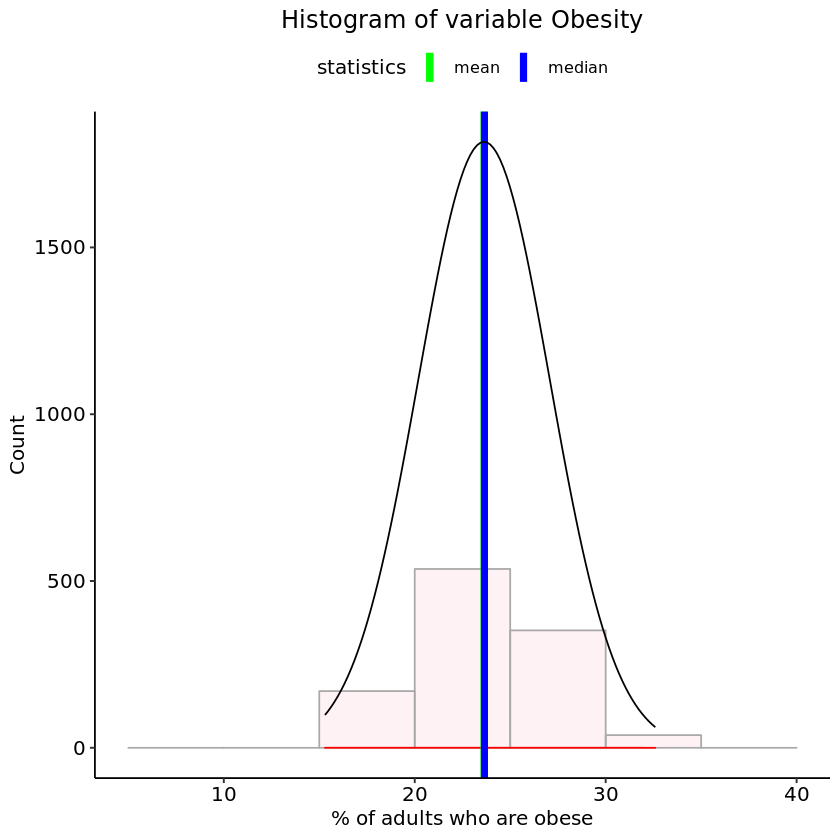

In [23]:
 #histogram of obesity with mean,median and normal curve
  n<-3141
  mean<- mean(data$Obesity)
  sd<- sqrt(var(data$Obesity))
  bindwidth<-5
  height<- rnorm(n,mean,sd)
  ggplot(data=data, aes(data$Obesity)) + geom_histogram(breaks=seq(5, 40, by = 5),col="darkgray", fill="pink", alpha=.2)+ 
    geom_density(col=2) + labs(title="Histogram of variable Obesity",x="% of adults who are obese", y="Count")+
    geom_vline(aes(xintercept=mean(data$Obesity),color='mean'),show.legend = TRUE,size=2)+
    geom_vline(aes(xintercept=median(data$Obesity),color='median'),show.legend = TRUE,size=2)+
    scale_color_manual(name='statistics',values=c(mean='green',median='blue'))+
    stat_function(fun=function(x,mean,sd,n,bw){dnorm(x=x,mean=mean,sd=sd)*n*bw}, args=c(mean=mean,sd=sd,n=n,bw=bindwidth))

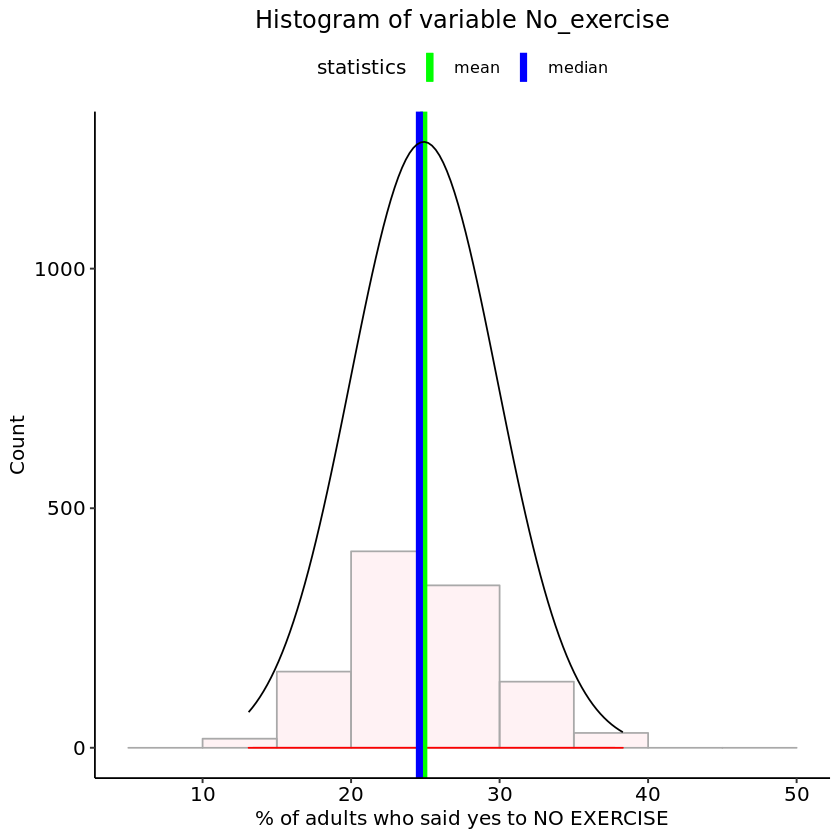

In [22]:
  #histogram of exercise with mean,median and normal curve
  n<-3141
  mean<- mean(data$No_Exercise)
  sd<- sqrt(var(data$No_Exercise))
  bindwidth<-5
  height<- rnorm(n,mean,sd)
  ggplot(data=data, aes(data$No_Exercise)) + geom_histogram(breaks=seq(5, 50, by = 5),col="darkgray", fill="pink", alpha=.2)+ 
    geom_density(col=2) + labs(title="Histogram of variable No_exercise",x="% of adults who said yes to NO EXERCISE", y="Count")+
    geom_vline(aes(xintercept=mean(data$No_Exercise),color='mean'),show.legend = TRUE,size=2)+
    geom_vline(aes(xintercept=median(data$No_Exercise),color='median'),show.legend = TRUE,size=2)+
    scale_color_manual(name='statistics',values=c(mean='green',median='blue'))+
    stat_function(fun=function(x,mean,sd,n,bw){dnorm(x=x,mean=mean,sd=sd)*n*bw}, args=c(mean=mean,sd=sd,n=n,bw=bindwidth))

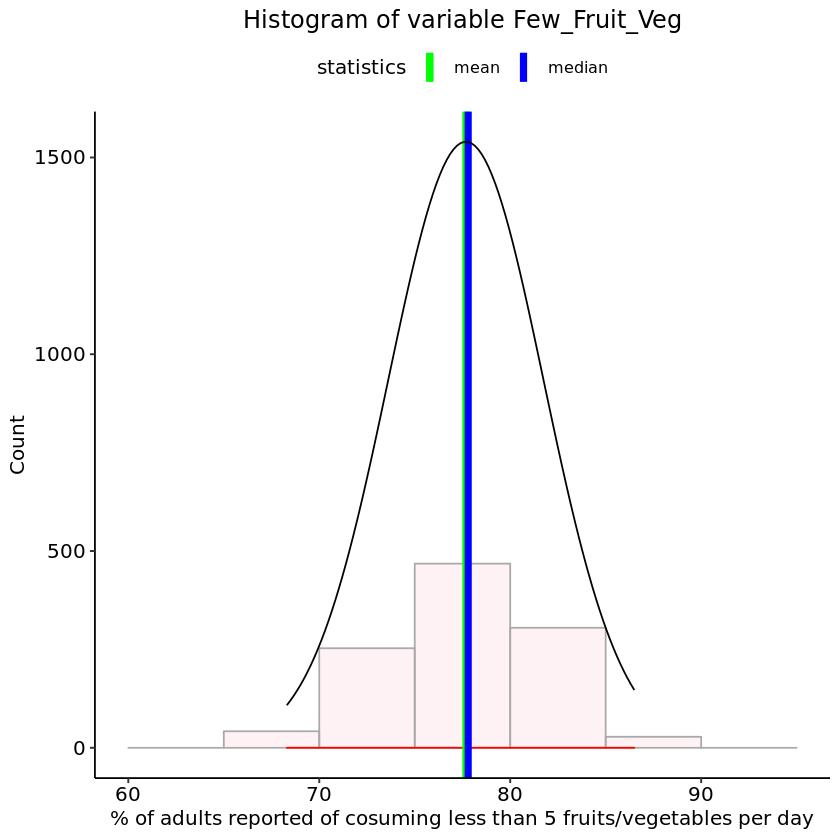

In [21]:
#histogram of few_veg_fruits with mean,median and normal curve
  n<-3141
  mean<- mean(data$Few_Fruit_Veg)
  sd<- sqrt(var(data$Few_Fruit_Veg))
  bindwidth<-5
  height<- rnorm(n,mean,sd)
  ggplot(data=data, aes(data$Few_Fruit_Veg)) + geom_histogram(breaks=seq(60, 95, by = 5),col="darkgray", fill="pink", alpha=.2)+ 
    geom_density(col=2) + labs(title="Histogram of variable Few_Fruit_Veg",x="% of adults reported of cosuming less than 5 fruits/vegetables per day", y="Count")+
    geom_vline(aes(xintercept=mean(data$Few_Fruit_Veg),color='mean'),show.legend = TRUE,size=2)+
    geom_vline(aes(xintercept=median(data$Few_Fruit_Veg),color='median'),show.legend = TRUE,size=2)+
    scale_color_manual(name='statistics',values=c(mean='green',median='blue'))+
    stat_function(fun=function(x,mean,sd,n,bw){dnorm(x=x,mean=mean,sd=sd)*n*bw}, args=c(mean=mean,sd=sd,n=n,bw=bindwidth))

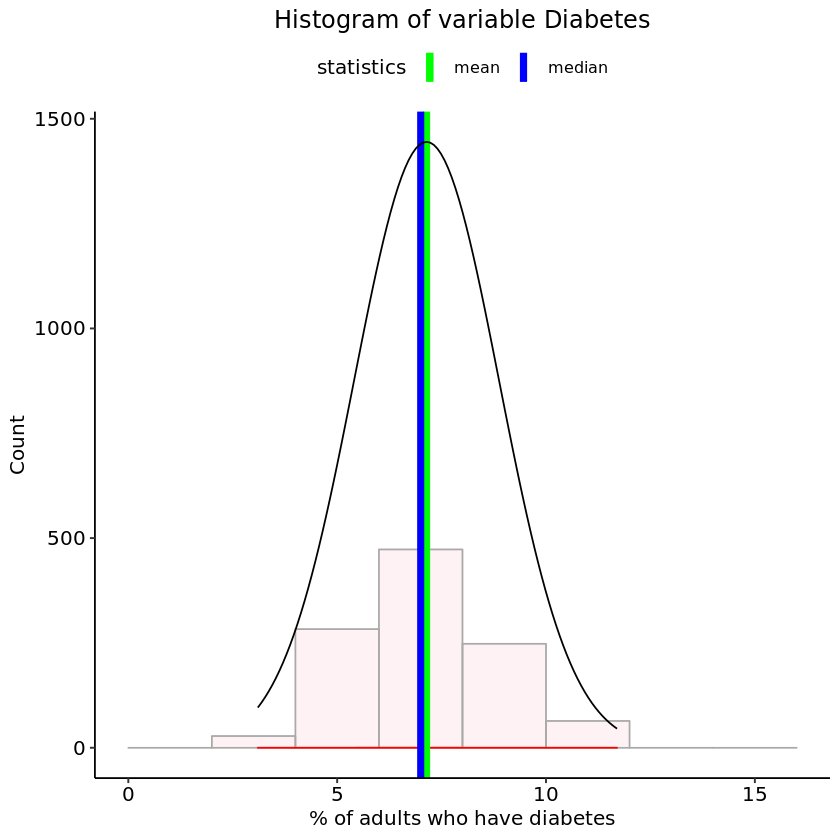

In [20]:
 #histogram of diabetes with mean,median and normal curve
  n<-3141
  mean<- mean(data$Diabetes)
  sd<- sqrt(var(data$Diabetes))
  bindwidth<-2
  height<- rnorm(n,mean,sd)
  ggplot(data=data, aes(data$Diabetes)) + geom_histogram(breaks=seq(0, 16, by = 2),col="darkgray", fill="pink", alpha=.2)+ 
    geom_density(col=2) + labs(title="Histogram of variable Diabetes",x="% of adults who have diabetes", y="Count")+
    geom_vline(aes(xintercept=mean(data$Diabetes),color='mean'),show.legend = TRUE,size=2)+
    geom_vline(aes(xintercept=median(data$Diabetes),color='median'),show.legend = TRUE,size=2)+
    scale_color_manual(name='statistics',values=c(mean='green',median='blue'))+
    stat_function(fun=function(x,mean,sd,n,bw){dnorm(x=x,mean=mean,sd=sd)*n*bw}, args=c(mean=mean,sd=sd,n=n,bw=bindwidth))

In [31]:
# correlation matrix
cordata <- data[, c(7,8,9,10,11,12,13)]
cormat <- round(cor(cordata),2)
cormat

,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,CHD
No_Exercise,1.00,0.32,0.48,0.44,0.41,0.48,0.47
Few_Fruit_Veg,0.32,1.00,0.35,0.09,0.25,0.11,0.16
Obesity,0.48,0.35,1.00,0.39,0.35,0.46,0.35
High_Blood_Pres,0.44,0.09,0.39,1.00,0.30,0.53,0.31
Smoker,0.41,0.25,0.35,0.30,1.00,0.37,0.34
Diabetes,0.48,0.11,0.46,0.53,0.37,1.00,0.35
CHD,0.47,0.16,0.35,0.31,0.34,0.35,1.00


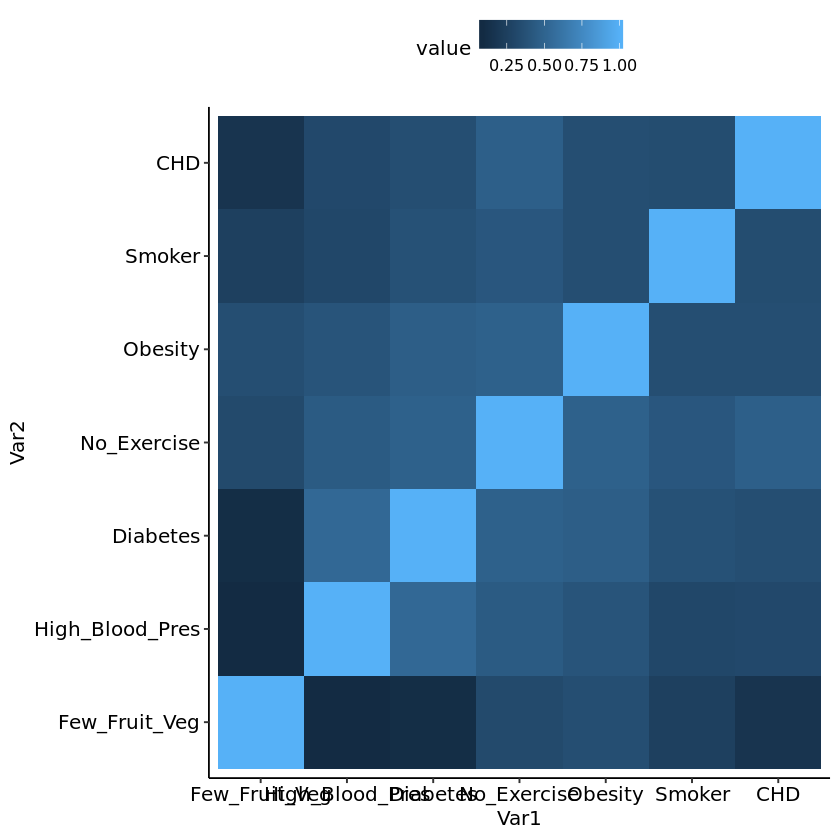

In [28]:
library(reshape2)
melted_cormat <- melt(cormat)

library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()


reorder_cormat <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd)
  cormat <-cormat[hc$order, hc$order]
}


In [32]:

# Get lower triangle of the correlation matrix
get_lower_tri<-function(cormat){
  cormat[upper.tri(cormat)] <- NA
  return(cormat)
}
# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
  cormat[lower.tri(cormat)]<- NA
  return(cormat)
}


upper_tri <- get_upper_tri(cormat)
upper_tri



# Melt the correlation matrix
library(reshape2)
melted_cormat <- melt(upper_tri, na.rm = TRUE)


,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,CHD
No_Exercise,1,0.32,0.48,0.44,0.41,0.48,0.47
Few_Fruit_Veg,NA,1.00,0.35,0.09,0.25,0.11,0.16
Obesity,NA,NA,1.00,0.39,0.35,0.46,0.35
High_Blood_Pres,NA,NA,NA,1.00,0.30,0.53,0.31
Smoker,NA,NA,NA,NA,1.00,0.37,0.34
Diabetes,NA,NA,NA,NA,NA,1.00,0.35
CHD,NA,NA,NA,NA,NA,NA,1.00


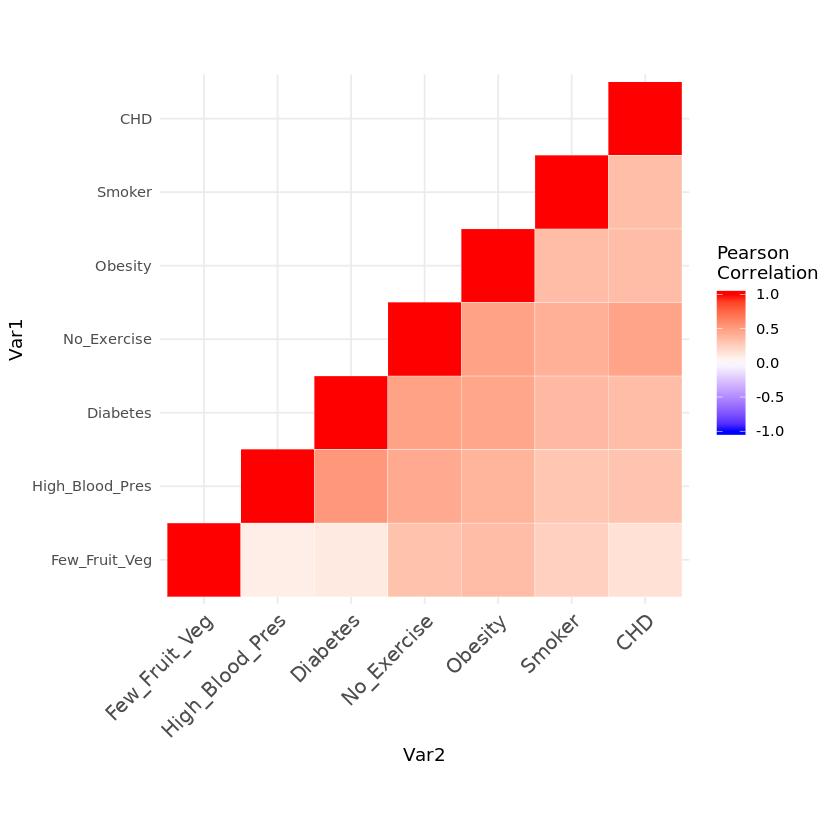

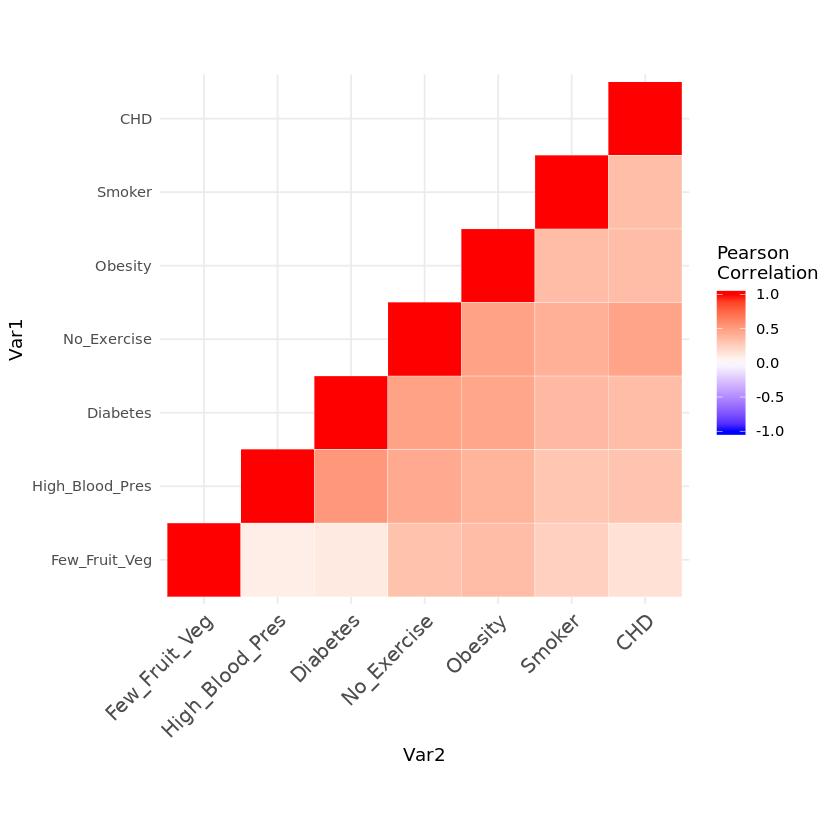

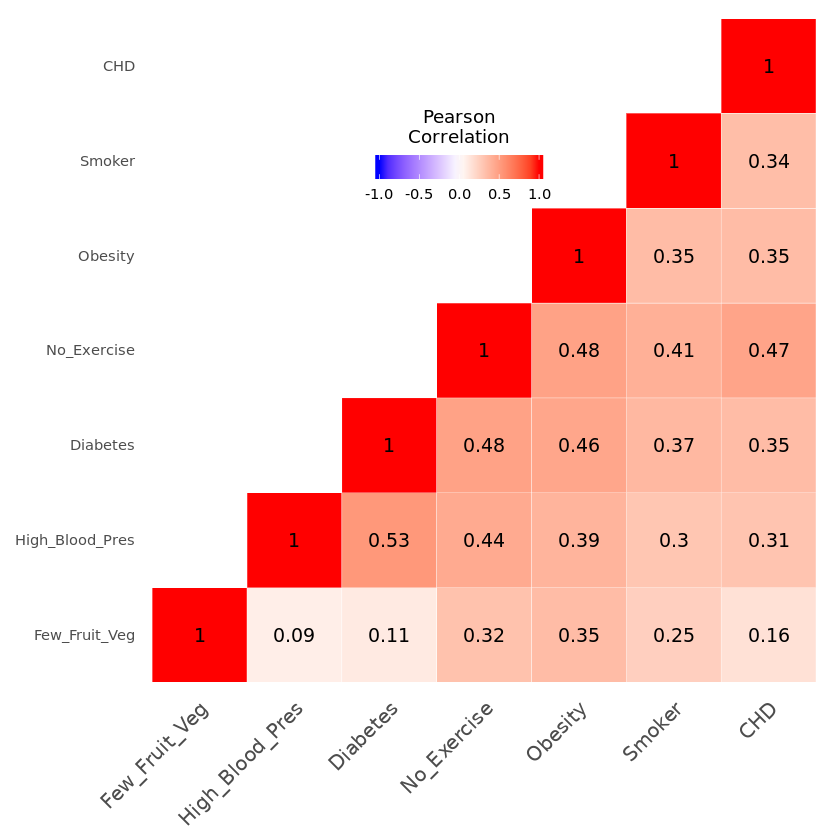

In [29]:
# Melt the correlation matrix
library(reshape2)
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Heatmap
library(ggplot2)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal()+ 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1))+
  coord_fixed()


reorder_cormat <- function(cormat){
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd)
  cormat <-cormat[hc$order, hc$order]
}
  
  cormat <- reorder_cormat(cormat)
  upper_tri <- get_upper_tri(cormat)
  # Melt the correlation matrix
  melted_cormat <- melt(upper_tri, na.rm = TRUE)
  ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
    geom_tile(color = "white")+
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab", 
                         name="Pearson\nCorrelation") +
    theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                     size = 12, hjust = 1))+
    coord_fixed()
  print(ggheatmap)
  
  
  
  
  ggheatmap + 
    geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) +
    theme(
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      panel.grid.major = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank(),
      axis.ticks = element_blank(),
      legend.justification = c(1, 0),
      legend.position = c(0.6, 0.7),
      legend.direction = "horizontal")+
    guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                                 title.position = "top", title.hjust = 0.5))



In [39]:

for (i in 1:nrow(data)) {
  print(data$CHD[i])
  if (90.0 < data$CHD[i] && data$CHD[i]<=150.0)
  {
    data$CHD[i]=1
  }
  if (150.0 < data$CHD[i] && data$CHD[i]<=200.0)
  {
    data$CHD[i]=2
  }
  if (200.0 < data$CHD[i] && data$CHD[i]<=250.0)
  {
    data$CHD[i]=3
  }
  if (250.0 < data$CHD[i] && data$CHD[i]<=300.0)
  {
    data$CHD[i]=4
  }
}

[1] 2
[1] 2
[1] 2
[1] 3
[1] 2
[1] 1
[1] 2
[1] 1
[1] 1
[1] 2
[1] 1
[1] 2
[1] 2
[1] 2
[1] 1
[1] 1
[1] 2
[1] 2
[1] 1
[1] 1
[1] 1
[1] 2
[1] 2
[1] 1
[1] 1
[1] 2
[1] 1
[1] 1
[1] 2
[1] 3
[1] 3
[1] 3
[1] 4
[1] 4
[1] 1
[1] 3
[1] 1
[1] 4
[1] 2
[1] 2
[1] 3
[1] 2
[1] 2
[1] 2
[1] 4
[1] 2
[1] 2
[1] 2
[1] 3
[1] 2
[1] 4
[1] 2
[1] 2
[1] 2
[1] 2
[1] 4
[1] 3
[1] 1
[1] 2
[1] 3
[1] 2
[1] 3
[1] 2
[1] 2
[1] 2
[1] 1
[1] 3
[1] 2
[1] 2
[1] 2
[1] 2
[1] 1
[1] 1
[1] 1
[1] 1
[1] 2
[1] 2
[1] 1
[1] 1
[1] 1
[1] 1
[1] 2
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 2
[1] 2
[1] 3
[1] 2
[1] 2
[1] 1
[1] 3
[1] 2
[1] 2
[1] 3
[1] 2
[1] 2
[1] 2
[1] 3
[1] 2
[1] 2
[1] 2
[1] 1
[1] 2
[1] 3
[1] 3
[1] 1
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 2
[1] 3
[1] 2
[1] 1
[1] 2
[1] 2
[1] 1
[1] 3
[1] 2
[1] 4
[1] 2
[1] 2
[1] 2
[1] 1
[1] 2
[1] 1
[1] 2
[1] 2
[1] 2
[1] 1
[1] 1
[1] 1
[1] 1
[1] 2
[1] 2
[1] 3
[1] 2
[1] 2
[1] 2
[1] 1
[1] 1
[1] 2
[1] 2
[1] 2
[1] 1
[1] 3
[1] 2
[1] 2
[1] 3
[1] 2
[1] 1
[1] 2
[1] 2
[1] 3
[1] 2
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 2
[1] 2
[1] 

In [41]:
head(data)

State_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Stroke,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,CHD
<int>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Baldwin,Alabama,AL,162586,48.7,27.2,76.2,23.6,30.5,24.6,7.2,2
1,Calhoun,Alabama,AL,112141,79.2,29.2,81.9,27.0,33.2,25.5,11.2,2
1,Chilton,Alabama,AL,41744,70.3,30.3,82.8,31.2,26.5,30.0,6.0,2
1,Cullman,Alabama,AL,79886,71.1,29.4,76.2,22.2,35.0,27.6,10.0,3
1,DeKalb,Alabama,AL,67271,58.6,37.0,80.7,24.3,35.3,19.1,7.8,2
1,Elmore,Alabama,AL,73937,60.4,27.7,85.0,24.8,23.0,22.6,5.5,1


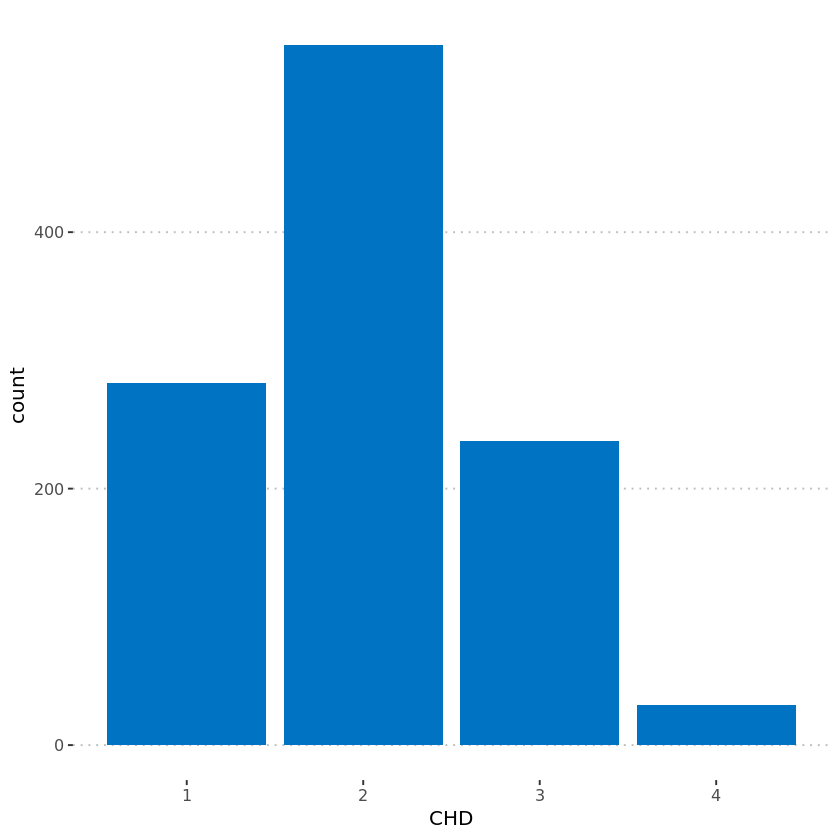

In [5]:
print(ggplot(data, aes(CHD)) +geom_bar(fill = "#0073C2FF") +theme_pubclean())

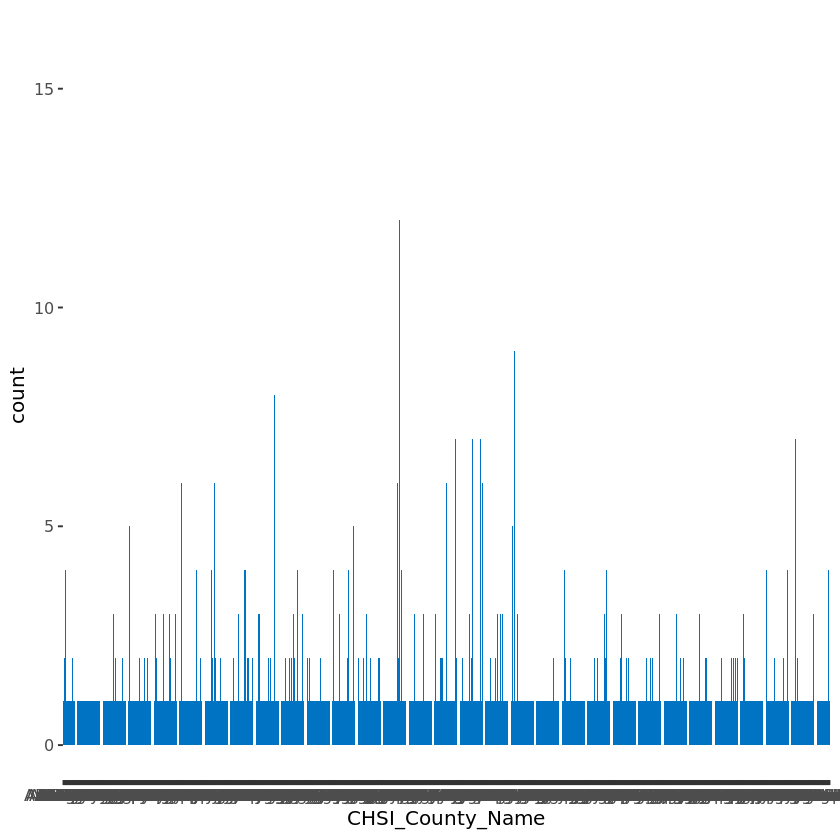

In [6]:
print(ggplot(data, aes(CHSI_County_Name)) +geom_bar(fill = "#0073C2FF") +theme_pubclean())

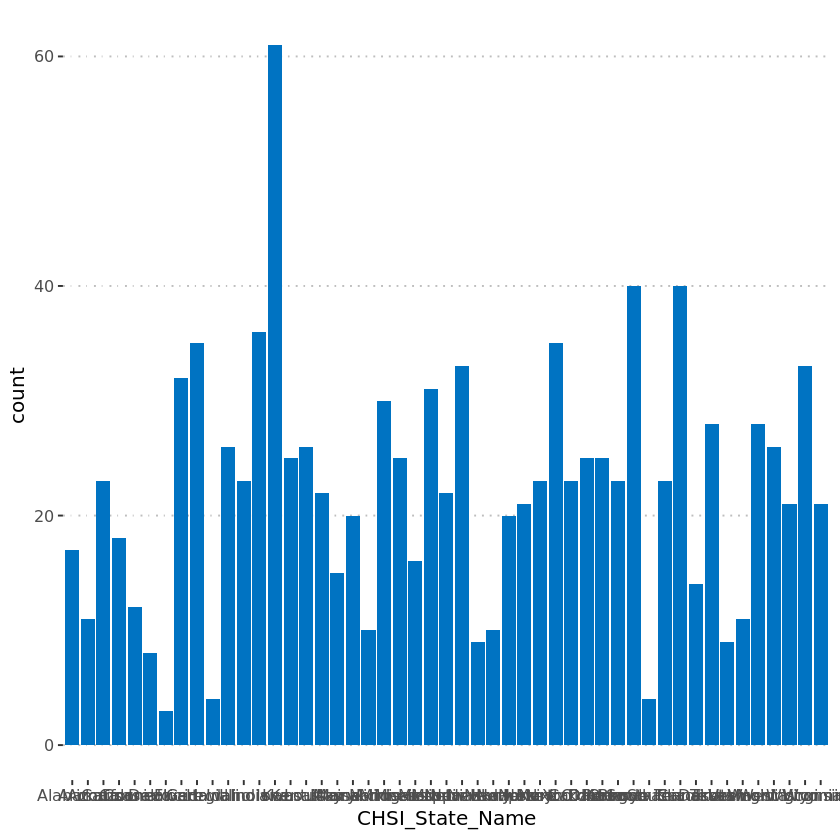

In [7]:
print(ggplot(data, aes(CHSI_State_Name)) +geom_bar(fill = "#0073C2FF") +theme_pubclean())

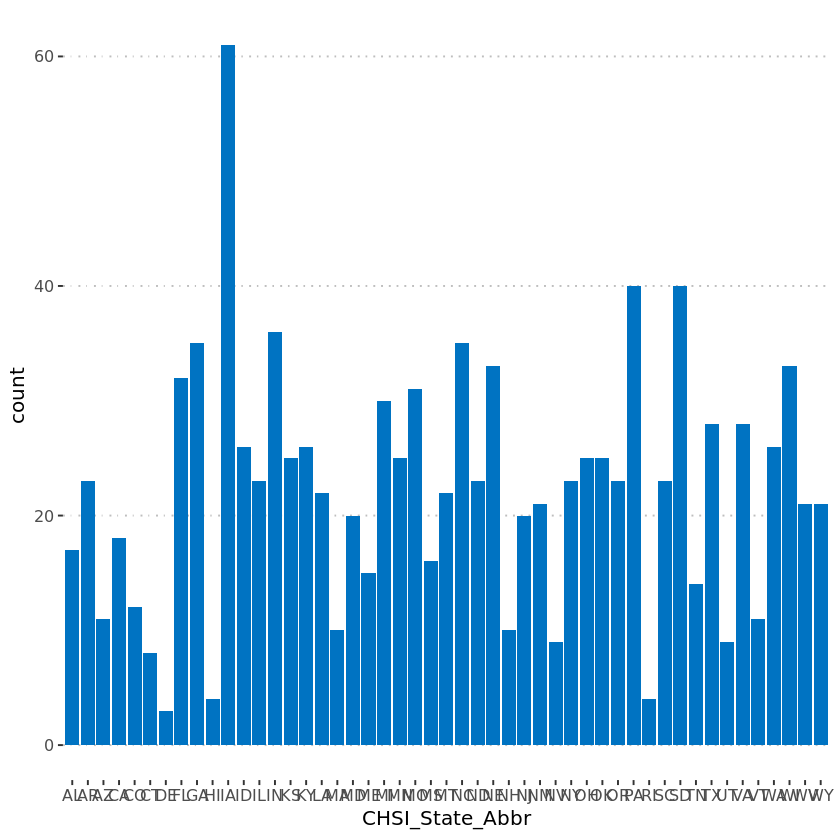

In [8]:
print(ggplot(data, aes(CHSI_State_Abbr)) +geom_bar(fill = "#0073C2FF") +theme_pubclean())

In [35]:
install.packages("e1071")
library(e1071)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [86]:
#Building Naive BayesModel
NB_Model=naiveBayes(CHD ~No_Exercise+Few_Fruit_Veg++Obesity+High_Blood_Pres+Smoker+Diabetes, data=data)

In [87]:
NB_Model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
         1          2          3          4 
0.25729927 0.49817518 0.21624088 0.02828467 

Conditional probabilities:
   No_Exercise
Y       [,1]     [,2]
  1 22.02908 4.742689
  2 24.91062 4.443649
  3 27.53502 4.345697
  4 30.52258 3.601084

   Few_Fruit_Veg
Y       [,1]     [,2]
  1 76.96773 4.011752
  2 77.57015 3.954680
  3 78.39114 4.129909
  4 80.59032 4.170720

   Obesity
Y       [,1]     [,2]
  1 22.08440 3.270689
  2 23.74322 3.398440
  3 24.86287 3.041321
  4 26.27742 3.089413

   High_Blood_Pres
Y       [,1]     [,2]
  1 24.44433 4.110803
  2 26.23663 4.120917
  3 27.51941 4.270747
  4 29.50000 3.923774

   Smoker
Y       [,1]     [,2]
  1 20.96596 3.643467
  2 23.00220 4.075525
  3 24.57637 4.073294
  4 25.82581 3.409787

   Diabetes
Y       [,1]     [,2]
  1 6.393262 1.616020
  2 7.124542 1.675288
  3 7.885654 1.627845
  4 8.512903 1.390382